In [1]:
import calfem.geometry as cfg
import calfem.mesh as cfm
import calfem.vis_mpl as cfv
import calfem.utils as cfu
import calfem.core as cfc
import numpy as np

import matplotlib as mpl

Could not import Matplotlib backends. Probarbly due to missing Qt.


Parameters

In [2]:
E = 5                   #Young's modulus, E [GPa]
v = 0.36                #Poisson's ratio, ν [-]
alpha = 0.00006         #Expansion coefficient, α [1/K]
p = 540                 #Density, ρ [kg/m3]
cp = 3600               #Specific heat, cp [J/kg-K]
k = 80                  #Thermal conductivity, k [W/m-K]
t = 1600
D = k*np.eye(2)

a_c = 120 # W/m2K
T_in = 277 #Kelvin
T_out = 285 #Kelvin
T_inf = 293 #Kelvin

In [3]:
g = cfg.Geometry() #Create geometry

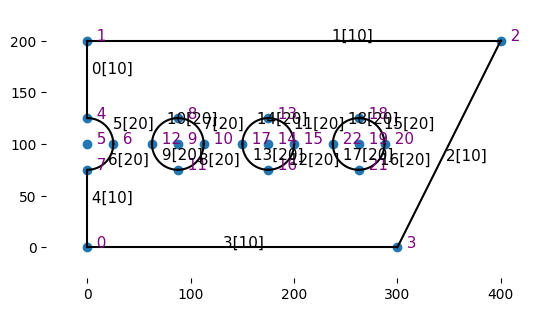

In [4]:
ZERO_CONVECTION = 10
CONST_HEAT = 20

g.point([0.0, 0.0]) # point 0
g.point([0.0, 200.0]) # point 1
g.point([400.0, 200.0]) # point 2
g.point([300.0, 0.0]) # point 3

g.point([0, 125]) # point 4
g.point([0, 100]) # center circle 1; point 5
g.point([25, 100])# point 6
g.point([0, 75]) # point 7

g.point([87.5, 125]) # point 8
g.point([87.5, 100]) # center circle 2; point 9
g.point([112.5, 100]) # point 10
g.point([87.5, 75]) # point 11
g.point([62.5, 100]) # point 12

g.point([175, 125]) # point 13
g.point([175, 100]) # center circle 3; point 14
g.point([200, 100]) #  point 15
g.point([175, 75]) # point 16
g.point([150, 100]) # point 17

g.point([262.5, 125]) # point 18
g.point([262.5, 100]) # center circle 3; point 19
g.point([287.5, 100]) #  point 20
g.point([262.5, 75]) # point 21
g.point([237.5, 100]) # point 22


g.spline([4, 1], marker=ZERO_CONVECTION)
g.spline([1, 2], marker=ZERO_CONVECTION)
g.spline([2, 3], marker=ZERO_CONVECTION)
g.spline([3, 0], marker=ZERO_CONVECTION)
g.spline([0, 7], marker=ZERO_CONVECTION)

#circle 1
g.circle([4, 5, 6], marker=CONST_HEAT) 
g.circle([6, 5, 7], marker=CONST_HEAT)

#circle 2
g.circle([8, 9, 10], marker=CONST_HEAT) 
g.circle([10, 9, 11], marker=CONST_HEAT)
g.circle([11, 9, 12], marker=CONST_HEAT) 
g.circle([12, 9, 8], marker=CONST_HEAT)

#circle 3
g.circle([13, 14, 15], marker=CONST_HEAT) 
g.circle([15, 14, 16], marker=CONST_HEAT)
g.circle([16, 14, 17], marker=CONST_HEAT) 
g.circle([17, 14, 13], marker=CONST_HEAT)

#circle 4
g.circle([18, 19, 20], marker=CONST_HEAT) 
g.circle([20, 19, 21], marker=CONST_HEAT)
g.circle([21, 19, 22], marker=CONST_HEAT) 
g.circle([22, 19, 18], marker=CONST_HEAT)


g.surface([0, 1, 2, 3, 4, 6, 5], ([7, 8, 9,10], [11,12,13,14], [15,16,17,18]))
cfv.draw_geometry(g)
cfv.show_and_wait()

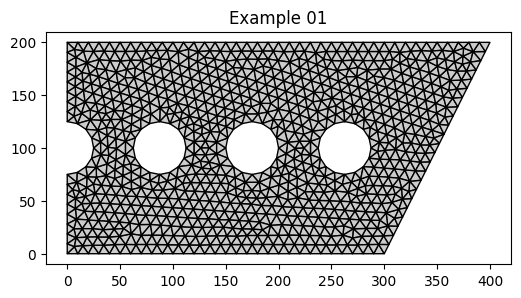

In [5]:
mesh = cfm.GmshMesh(g)

mesh.el_type = 2         # Element type is triangle
mesh.dofs_per_node = 1     # Degrees of freedom per node
mesh.el_size_factor = 10 # Element size Factor

coords, edof, dofs, bdofs, elementmarkers = mesh.create()

cfv.figure()
cfv.drawMesh(
    coords=coords,
    edof=edof,
    dofs_per_node=mesh.dofsPerNode,
    el_type=mesh.elType,
    filled=True,
    title="Example 01"
        )
cfv.show()

In [6]:
nDofs = np.size(dofs)
ex, ey = cfc.coordxtr(edof, coords, dofs)
bc = np.array([],'i')
bcVal = np.array([],'f')
ex, ey = cfc.coordxtr(edof, coords, dofs)

K = np.zeros((len(coords), len(coords)))

for element in range(len(edof)):
    ex_n = np.array(ex[element])
    ey_n = np.array(ey[element])

    Cmat = np.vstack((np.ones((3, )), ex_n, ey_n))
    A = np.linalg.det(Cmat)/2
    B = np.matrix([[ey_n[1] - ey_n[2], ey_n[2] - ey_n[0], ey_n[0] - ey_n[1]], 
                  [ex_n[2] - ex_n[1], ex_n[0] - ex_n[2], ex_n[1] - ex_n[0]]])
                  
    B_e = A*B
    K_e = k * np.matmul(B_e.transpose(1, 0), B_e) * t * A
    cfc.assem(edof, K, K_e)

In [8]:
f = np.zeros([nDofs, 1])
Kc = np.zeros([nDofs, nDofs])

for element in edof:
    for i in range(3):
        for j in range(i+1, 3):
            if element[i] in mesh.bdofs[ZERO_CONVECTION] and element[j] in mesh.bdofs[ZERO_CONVECTION]:
                # do convection things
                dist = np.linalg.norm(element[i]-element[j])
                Kce = np.zeros((2,2))
            
            if element[i] in mesh.bdofs[CONST_HEAT] and element[j] in mesh.bdofs[CONST_HEAT]:
                # do const flux
                dist = np.linalg.norm(element[i]-element[j])

                
                
        
            
bc = np.array([],'i')
bcVal = np.array([],'f')

bc, bcVal = cfu.applybc(bdofs, bc, bcVal, ZERO_CONVECTION, 0.0, 0)
bc, bcVal = cfu.applybc(bdofs, bc, bcVal, CONST_HEAT, 100, 0)


IndentationError: expected an indented block (2735870195.py, line 9)

In [ ]:
# Solving system
a, r = cfc.solveq(K, f, bc, bcVal)

cfv.figure()
cfv.draw_nodal_values(a, coords, edof)
cfv.show()
